## Reklam Harcamalarının Satış üzerine Etkisi

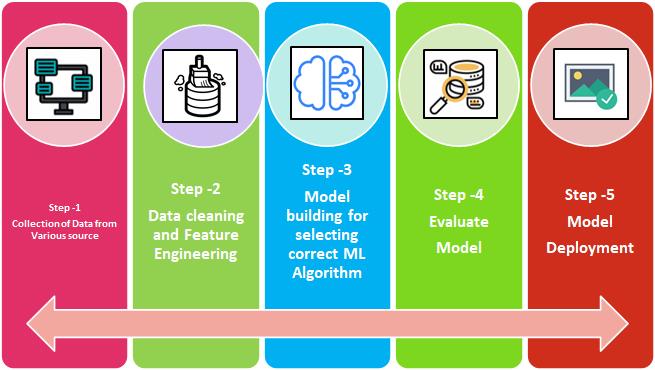

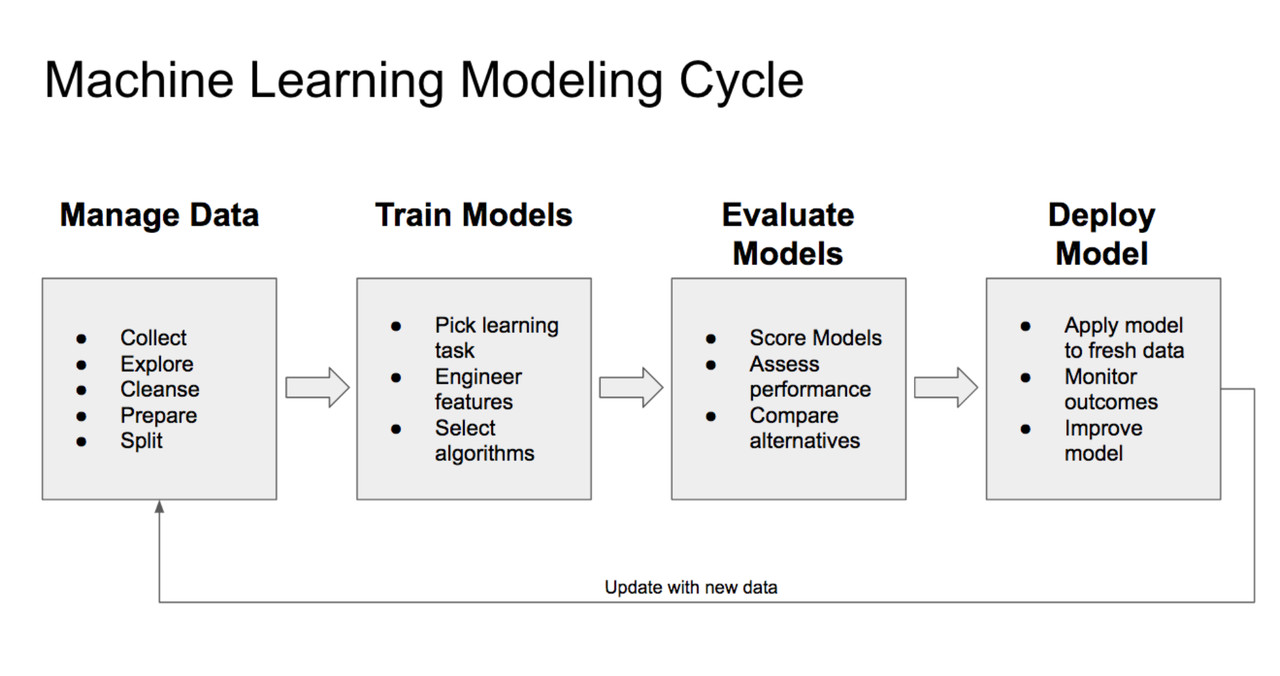

Reklam harcamalarının satışlar üzerine etkisini Çoklu Doğrusal Regresyon ile modelleme.

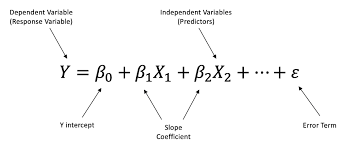

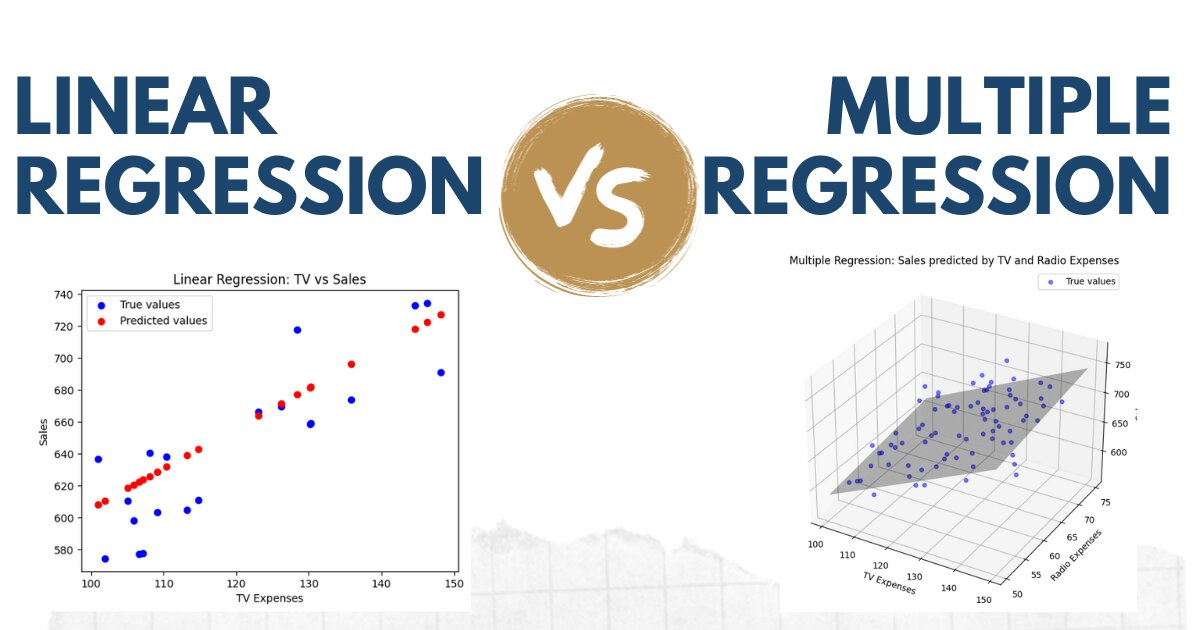

## Kütüphaneleri yükle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#filter warnings
import warnings
warnings.filterwarnings("ignore")

## Veriyi Yükle

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3073-49B7

 Directory of C:\Users\murat\Documents\BTKTemmuz2024\day 6

22.07.2024  10:53    <DIR>          .
22.07.2024  10:18    <DIR>          ..
22.07.2024  10:39    <DIR>          .ipynb_checkpoints
22.07.2024  10:43             4.063 advertising.csv
22.07.2024  10:53           630.944 Reklem satis.ipynb
               2 File(s)        635.007 bytes
               3 Dir(s)  116.898.349.056 bytes free


In [7]:
df=pd.read_csv("advertising.csv")

## Veri Ön işleme

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: >

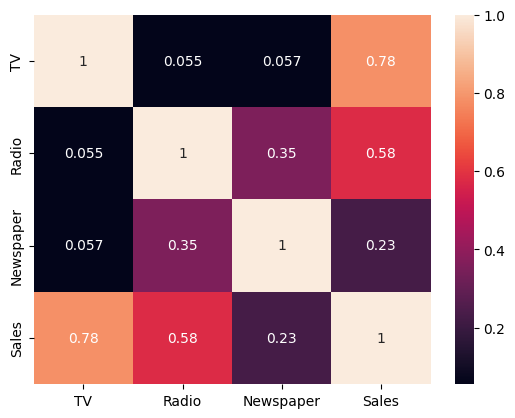

In [11]:
#korelasyon
sns.heatmap(df.corr(),annot=True)

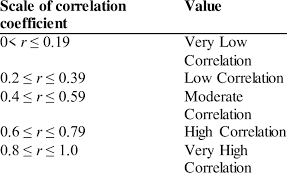

TV reklamaları ile satışlar arasında yüksek derede koralasyon var.

Radyo reklamları harcamaları ile satışlşar arasında orta derece bir korealsyon var.

In [13]:
pip install -U scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 487.6 kB/s eta 0:00:23
   ---------------------------------------- 0.1/11.0 MB 819.2 kB/s eta 0:00:14
    --------------------------------------- 0.2/11.0 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.4/11.0 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.0 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 0.9/11.0 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/11.0 MB 3.2 MB/s eta 0:00:04
   ----- ---------------------------------- 1.5/11.0 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/11.0 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.0 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.0 MB 3.3 MB/s eta 0:00:03
   ------

In [14]:
#Kütüphaneleri yükle
# veri setini bölmek için (Veri ön işleme)
from sklearn.model_selection import train_test_split

#Ölçeklendirme (Veri ön işleme)
from sklearn.preprocessing import StandardScaler

#Linear Regression (Modelleme)
from sklearn.linear_model import LinearRegression

#Değerlendirme
from sklearn.metrics import mean_squared_error, r2_score

## Özellikleri ve hedef Sütununu belirle

In [16]:
X=df[['TV','Radio','Newspaper']]
#X=df.drop('Sales',axis=1)
y=df['Sales']

## Veri setini eğitim ve test olarak böl

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=.2,
                                              random_state=42)
# Random state=42 rastgele oluşturlan veri serlerinden 42 numaralı olanı al

## Modeli Oluştur

In [18]:
lr=LinearRegression() #bir lineer regresyon nesnesi türet

## Modeli Eğit

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

##  Tahminleri yap

In [20]:
y_predict=lr.predict(X_test)

In [21]:
y_predict

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [22]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [23]:
model_predict_actual=pd.DataFrame({'Predict':y_predict,'Actual':y_test})
model_predict_actual

,Predict,Actual
95,16.408024,16.9
15,20.889882,22.4
30,21.553843,21.4
158,10.608503,7.3
128,22.112373,24.7
115,13.105592,12.6
69,21.057192,22.3
170,7.461010,8.4
174,13.606346,11.5
45,15.155070,14.9


In [24]:
model_predict_actual['Error']=abs(model_predict_actual['Actual']-model_predict_actual['Predict'])
model_predict_actual

,Predict,Actual,Error
95,16.408024,16.9,0.491976
15,20.889882,22.4,1.510118
30,21.553843,21.4,0.153843
158,10.608503,7.3,3.308503
128,22.112373,24.7,2.587627
115,13.105592,12.6,0.505592
69,21.057192,22.3,1.242808
170,7.461010,8.4,0.938990
174,13.606346,11.5,2.106346
45,15.155070,14.9,0.255070


In [25]:
model_predict_actual.mean()

Predict    13.810021
Actual     13.712500
Error       1.460757
dtype: float64

## Değerlendirme

In [27]:
print('R2 Score',r2_score(y_test,y_predict))

R2 Score 0.899438024100912


R2 değeri 0-1 arasında değer alır. 1 e yaklaştıkça model mükemmel olur.

In [28]:
# MSE ve RMSE hatalrın kareler ortlaması ve hataların karelerinin kare kökü

print('MSE',mean_squared_error(y_test,y_predict))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_predict)))

MSE 3.1740973539761033
RMSE 1.78159966153345


### Bu formülün katsayılarını ve sabit sayılarını bulmaya çalışıyoruz
### satışlar= Sabit+ katsayı1*Tv+ katsayı2*Radio+ katsayı3*Newspaper + Hata 
### TV Radyo Newspaper

In [30]:
# katsayılar
print('katsayılar',lr.coef_)
#Sütun sıralaması şeklinde katsayılar TV Radio ve News paper

katsayılar [0.04472952 0.18919505 0.00276111]


In [31]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
# sabit Terim
lr.intercept_

2.979067338122629

In [33]:
#ilk örnek için satıiı hesağlayalım
Satış=2.98+(0.045*230)+(0.19*38)+(0.003*70)
print(Satış)


20.76


In [34]:
#Yunus Emre'den İstatisik model oalrak açıklaması
import statsmodels.formula.api as sm
model=sm.ols(formula="Sales~TV+Radio+Newspaper",data=df).fit()
coef=model.params
fit=coef[0]+coef[1]*df.TV+coef[2]*df.Radio+coef[3]*df.Newspaper
res=df.Sales-fit
print(fit)
print(res)
print(model.summary())

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64
0      1.576026
1     -1.937855
2     -3.007671
3      0.902170
4     -0.288672
         ...   
195    2.229658
196    1.534688
197    0.014079
198    1.732679
199   -1.773196
Length: 200, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.58e-96
Time:                        12:17:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:               

## Özellikleri Standartlaştırma

In [35]:
#standartlaştırma
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [36]:
lr.fit(X_train_sc,y_train)

LinearRegression()

In [37]:
y_predict=lr.predict(X_test_sc)

In [38]:
mean_squared_error(y_test,y_predict)

3.588163345396854

In [39]:
mean_squared_error(y_test,y_predict)**.5

1.8942447955311514